In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')


In [2]:
# Data exploration
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")


Dataset shape: (9994, 21)

Column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

First few rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Hen

In [3]:
# Data cleaning
df = df.drop_duplicates()
df = df.dropna()
print(f"Clean dataset: {df.shape[0]} rows")

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter


Clean dataset: 9994 rows


In [4]:
# Calculate key metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Total Orders: 5,009
Total Customers: 793


In [5]:
# Category analysis
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

print("\nSales by Category:")
print(category_sales)
print("\nProfit by Category:")
print(category_profit)



Sales by Category:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Profit by Category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


In [6]:
# Regional analysis
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(region_sales)



Sales by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


In [7]:
# Customer segment analysis
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Segment:")
print(segment_sales)



Sales by Segment:
Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64


In [8]:
# Top products
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
print("\nTop 10 Products:")
print(top_products)




Top 10 Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [9]:
# Sub-category analysis
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)

print("\nTop Sub-Categories by Sales:")
print(subcat_sales)
print("\nTop Sub-Categories by Profit:")
print(subcat_profit)



Top Sub-Categories by Sales:
Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

Top Sub-Categories by Profit:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: Profit, dtype: float64


In [10]:
# Temporal analysis
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

print("\nMonthly Sales:")
print(monthly_sales)
print("\nQuarterly Sales:")
print(quarterly_sales)



Monthly Sales:
Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

Quarterly Sales:
Quarter
1    359681.5758
2    445509.6196
3    613932.1057
4    878077.5592
Name: Sales, dtype: float64


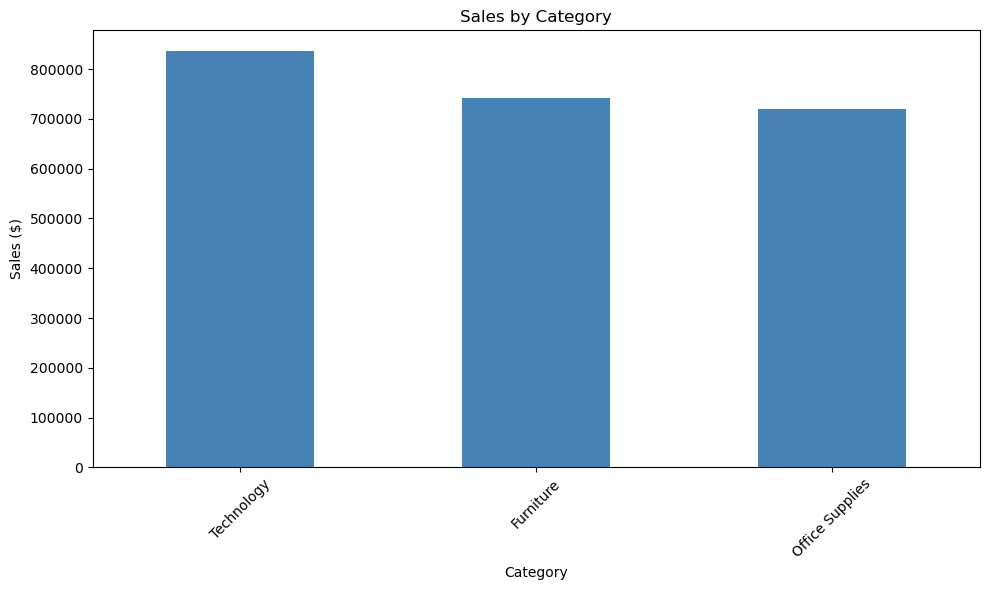

In [11]:
# Visualization 1: Category sales
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='steelblue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('category_sales.png', dpi=300)
plt.show()


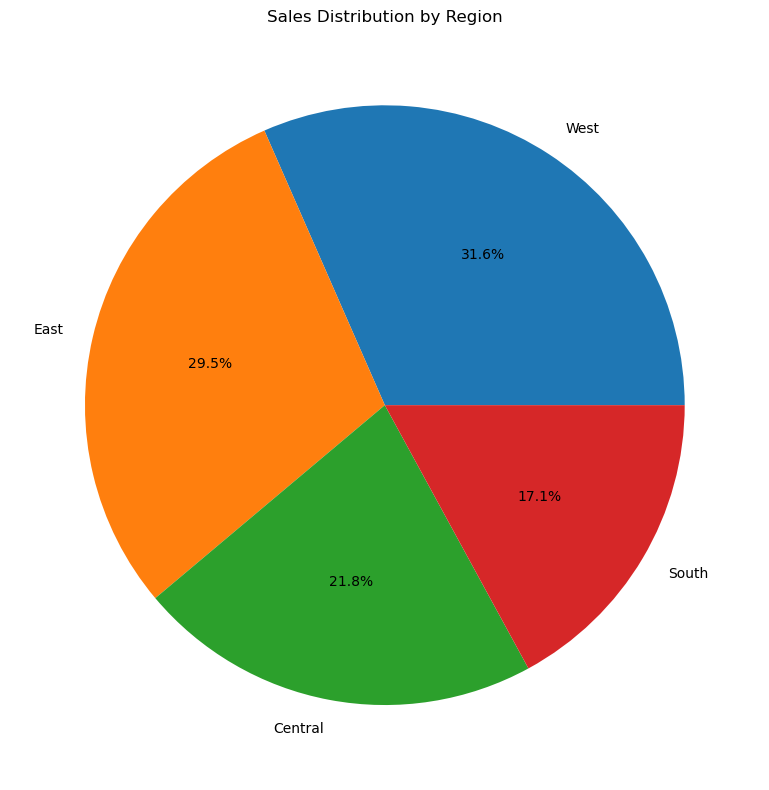

In [12]:
# Visualization 2: Regional distribution
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.savefig('regional_sales.png', dpi=300)
plt.show()


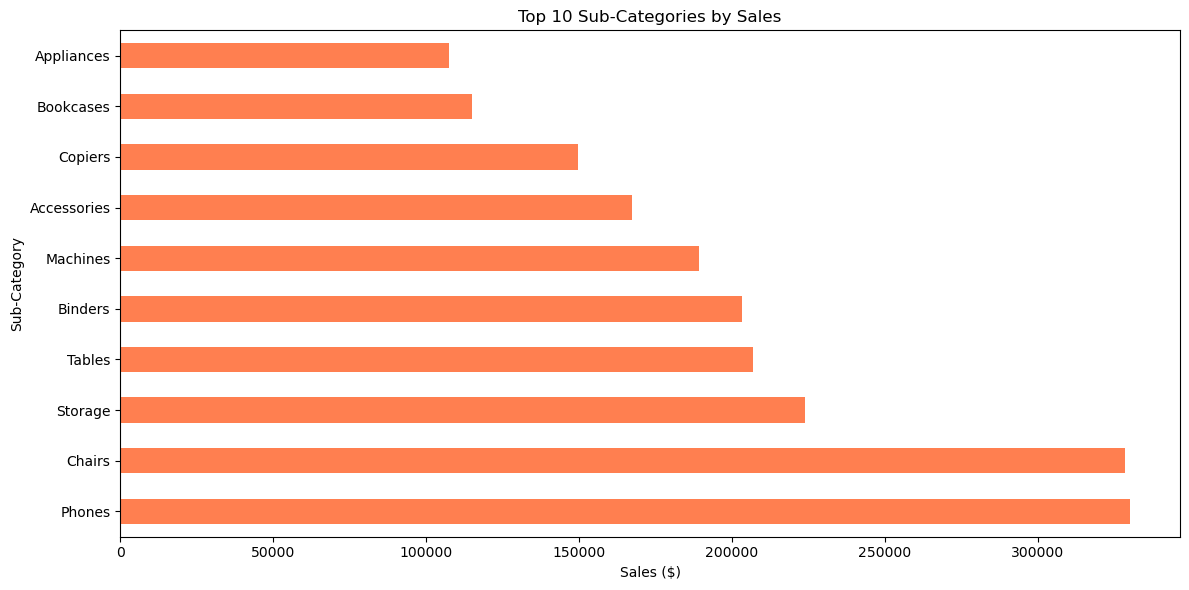

In [13]:
# Visualization 3: Top sub-categories
plt.figure(figsize=(12, 6))
subcat_sales.plot(kind='barh', color='coral')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sales ($)')
plt.tight_layout()
plt.savefig('subcategory_sales.png', dpi=300)
plt.show()



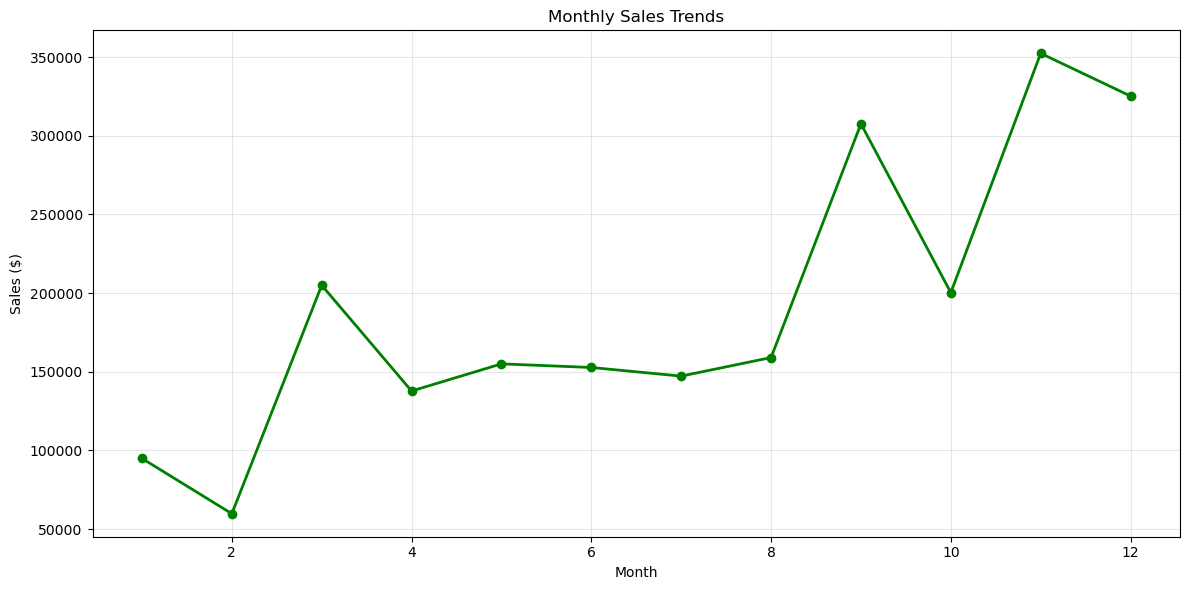

In [14]:
# Visualization 4: Monthly trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linewidth=2, color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300)
plt.show()


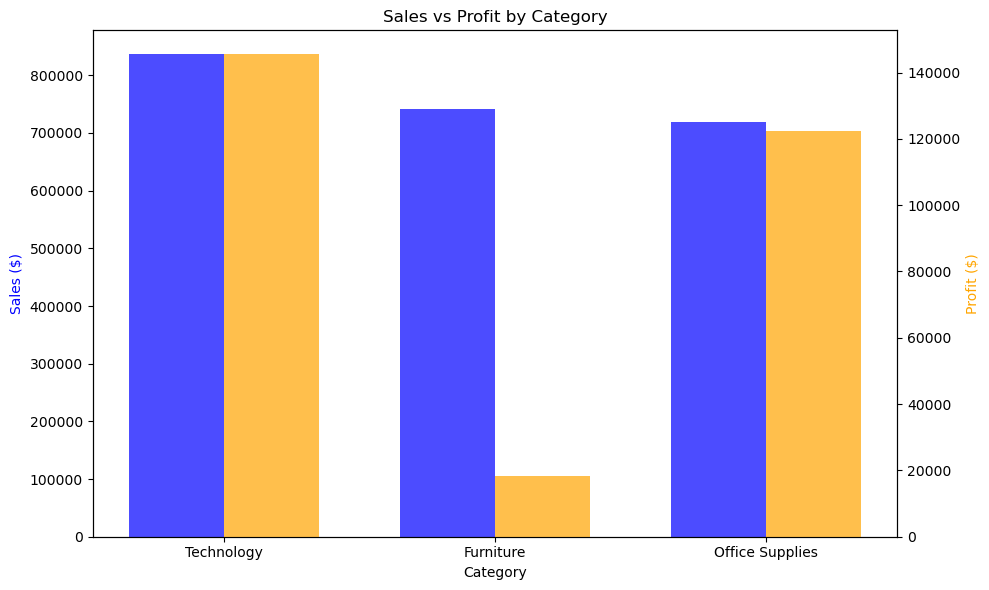

In [15]:
# Visualization 5: Sales vs profit
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(category_sales))
width = 0.35

ax1.bar([i - width/2 for i in x], category_sales.values, width, label='Sales', color='blue', alpha=0.7)
ax1.set_xlabel('Category')
ax1.set_ylabel('Sales ($)', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(category_sales.index)

ax2 = ax1.twinx()
ax2.bar([i + width/2 for i in x], category_profit[category_sales.index].values, width, label='Profit', color='orange', alpha=0.7)
ax2.set_ylabel('Profit ($)', color='orange')

plt.title('Sales vs Profit by Category')
plt.tight_layout()
plt.savefig('sales_profit_comparison.png', dpi=300)
plt.show()



In [16]:
# Summary findings
print("\nKey Findings:")
print(f"1. Highest revenue category: {category_sales.idxmax()} (${category_sales.max():,.0f})")
print(f"2. Highest profit category: {category_profit.idxmax()} (${category_profit.max():,.0f})")
print(f"3. Best performing region: {region_sales.idxmax()} (${region_sales.max():,.0f})")
print(f"4. Largest customer segment: {segment_sales.idxmax()} (${segment_sales.max():,.0f})")
print(f"5. Peak sales month: {monthly_sales.idxmax()} (${monthly_sales.max():,.0f})")



Key Findings:
1. Highest revenue category: Technology ($836,154)
2. Highest profit category: Technology ($145,455)
3. Best performing region: West ($725,458)
4. Largest customer segment: Consumer ($1,161,401)
5. Peak sales month: 11 ($352,461)
